#K-means

Criação de 5 clusters e agrupar por idade e Spending Score (1-100)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Leitura dos dados

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/evelynsantos/Data-visualization/main/dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

### Verificar dados nulos

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Informações estatísticas

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gerando gráfico da idade versus score do cliente

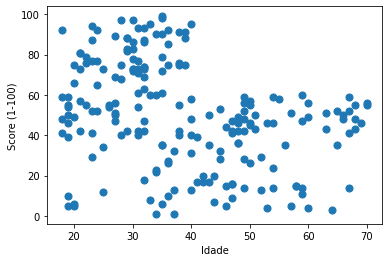

In [9]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50)
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

selecione os dados de 'Age' e 'Spending Score (1-100)' no dataframe para realizar o agrupamento com kmeans

In [13]:
# selecione no dataframe df as colunas Age e Spending Score (1-100)
X = df[['Age', 'Spending Score (1-100)']]
X.head()


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


### Clusterizando com k = 5

In [14]:
modelo_kmeans = KMeans(n_clusters= 5, init='k-means++')

y_kmeans= modelo_kmeans.fit_predict(X)

print(y_kmeans)

[2 1 4 1 0 1 4 1 4 1 4 1 4 1 4 1 0 2 0 1 0 1 4 1 4 1 0 2 0 1 4 1 4 1 4 1 4
 1 0 1 3 1 0 2 0 2 3 2 2 0 3 2 2 3 3 0 3 3 2 3 3 2 3 3 3 2 0 3 2 2 3 0 3 3
 3 2 3 0 2 0 3 2 3 0 2 3 3 2 2 3 3 2 3 0 0 2 3 2 0 2 2 3 3 2 3 2 3 3 3 3 3
 2 0 2 2 2 3 3 3 3 2 0 2 1 0 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 0 1
 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 0 1 4 1 0 2 4 1 4 1 4 1 4 1 4 1 0 1 4 1 0
 1 4 2 4 1 4 1 4 1 4 1 0 1 4 1]


### Plot um gráfico com todos os grupos

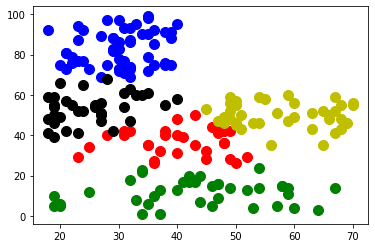

In [15]:
#visualizando todos os grupos
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = X[y_kmeans == k]
    plt.scatter(cluster['Age'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')